In [32]:
from util import data_exploration
import pandas as pd

def pre_process(df):
    all_cero_column=data_exploration.check_all_zero(df)
    df= data_exploration.drop_column(df,all_cero_column)
    total_load_df=data_exploration.pre_process_totalload(df)
    return total_load_df


energy_df = pd.read_csv('energy_dataset.csv')
total_load_df = pre_process(energy_df)
total_load_df


/Users/silje/Documents/ai_industry/AI-in-industry/util/data_exploration.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_load_df["month"]= total_load_df.index.month
/Users/silje/Documents/ai_industry/AI-in-industry/util/data_exploration.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_load_df["weekday"]= total_load_df.index.weekday
/Users/silje/Documents/ai_industry/AI-in-industry/util/data_exploration.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,total load actual,month,weekday,hour
time,,,,
2014-12-31 23:00:00+00:00,25385.0,12,2,23
2015-01-01 00:00:00+00:00,24382.0,1,3,0
2015-01-01 01:00:00+00:00,22734.0,1,3,1
2015-01-01 02:00:00+00:00,21286.0,1,3,2
2015-01-01 03:00:00+00:00,20264.0,1,3,3
...,...,...,...,...
2018-12-31 18:00:00+00:00,30653.0,12,0,18
2018-12-31 19:00:00+00:00,29735.0,12,0,19
2018-12-31 20:00:00+00:00,28071.0,12,0,20


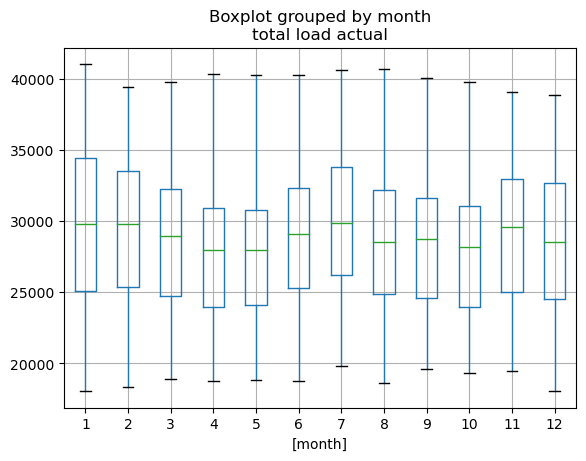

In [30]:
total_load_df[['month', 'total load actual']].boxplot(by='month');

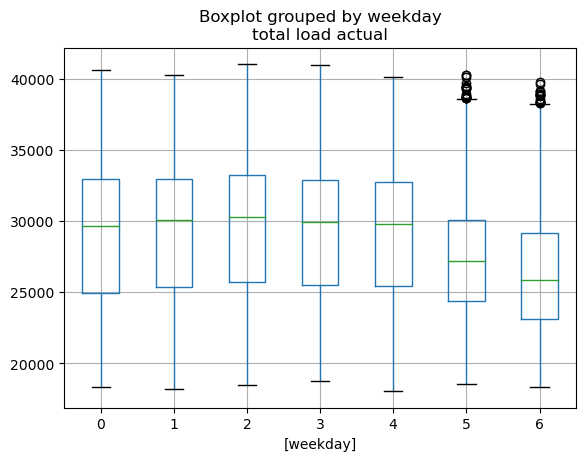

In [31]:
total_load_df[['weekday', 'total load actual']].boxplot(by='weekday');

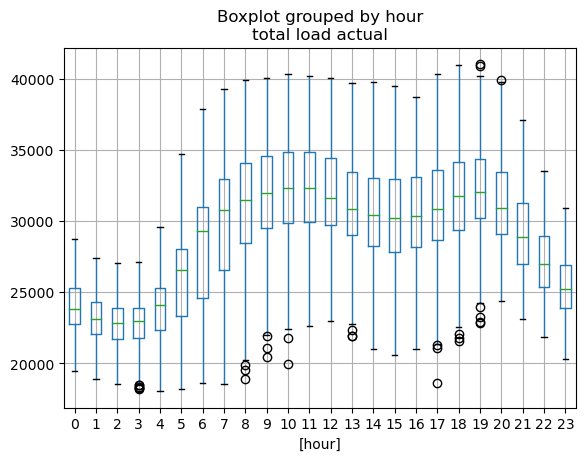

In [33]:
total_load_df[['hour', 'total load actual']].boxplot(by='hour');
# Clear correlation on the hour of the day
# peek around 10 and around 19

In [38]:
from util import neuralprobabilistic
in_cols = total_load_df.columns()
print(in_cols)
#neuralprobabilistic.build_nn_normal_model(,1,)

ModuleNotFoundError: No module named 'tensorflow'

In [34]:
tmp = total_load_df[total_load_df.index.hour == 10]['total load actual']
tmpv = tmp.value_counts(sort=False, normalize=True).sort_index()

In [35]:
import numpy as np
import tensorflow_probability as tfp


# Calculate the sample mean and variance
mean_load = np.mean(total_load_df["total_load_actual"])
var_load = np.var(total_load_df["total_load_actual"])

# Method of moments estimates for alpha and beta
alpha = mean_load ** 2 / var_load
beta = mean_load / var_load
# Estimate the parameters for the Gamma distribution
gamma_dist = tfp.distributions.Gamma(concentration=alpha, rate=beta)

KeyError: 'total_load_actual'